# Final Project Group 6

 - Group Name : Hemapython
 - Batch      : 18
 - Member     : Alya, Ariq, Lewis, Tidar, Jordy, Yushinta, Fauzan, Hafidz

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#  Mengubah parameter default matplotlib
#  Parameter default matplotlib dapat diubah dengan rcParams sebagai berikut

from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Load Dataset

In [3]:
df = pd.read_csv('TravelInsurancePrediction.csv')
df.head(3)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1


# Desriptive Statistics

Gunakan function info dan describe pada dataset final project kalian.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [5]:
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


## Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?

- Dari df.info() terlihat bahwa terdapat kolom 'Unnamed: 0' yang merupakan repetisi dari index, sehingga dapat dilakukan drop untuk menghilangkan kolom tersebut.
- 'Employment Type' bisa diubah menjadi 'EmploymentType' jika ingin menyamakan dengan yang lain (tanpa spasi)
- Beberapa kolom perlu di label encoding

## Apakah ada kolom yang memiliki nilai kosong?
- Dilihat dari hasil df.info dan juga df.isna().sum() terlihat bahwa data tidak memiliki nilai kosong
- Dilihat dari unique values, semua unique values memiliki value dan tidak ada ' ' sebagai value
- Data terdiri dari 1987 baris, tidak ada yang bermasalah dalam kasus ini


In [6]:
df.isna().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [7]:
for i in df.columns:
    print(i,"nilai kolom-kolom:",df[i].unique())

Unnamed: 0 nilai kolom-kolom: [   0    1    2 ... 1984 1985 1986]
Age nilai kolom-kolom: [31 34 28 25 33 26 32 29 35 30 27]
Employment Type nilai kolom-kolom: ['Government Sector' 'Private Sector/Self Employed']
GraduateOrNot nilai kolom-kolom: ['Yes' 'No']
AnnualIncome nilai kolom-kolom: [ 400000 1250000  500000  700000 1150000 1300000 1350000 1450000  800000
 1400000  850000 1500000 1050000  350000 1100000  600000  900000  550000
  300000  750000 1200000 1000000  950000 1700000 1750000  650000  450000
 1650000 1800000 1550000]
FamilyMembers nilai kolom-kolom: [6 7 4 3 8 9 5 2]
ChronicDiseases nilai kolom-kolom: [1 0]
FrequentFlyer nilai kolom-kolom: ['No' 'Yes']
EverTravelledAbroad nilai kolom-kolom: ['No' 'Yes']
TravelInsurance nilai kolom-kolom: [0 1]


## Apakah ada kolom yang memiliki nilai summary agak aneh?

Numerical
- Kolom **Age**, **AnnualIncome**, **FamilyMembers** terlihat sudah cukup simetrik karena nilai mean dan median tidak terlihat jauh
- Untuk min/max semua sudah terlihat normal


Category
- Tidak ada keanehan dalam kolom-kolom ini, 
- data didominasi oleh pekerja sektor swasta/self employed, lulus, bukan frequent flyer, dan tidak pernah keluar negeri
- data-data bersifat binner, sehingga bisa melakukan data transformation untuk menjadi 

In [8]:
#Cuplikan data
df.sample(5)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
134,134,28,Private Sector/Self Employed,Yes,600000,5,0,Yes,No,0
1397,1397,28,Private Sector/Self Employed,Yes,900000,9,1,No,Yes,0
1359,1359,32,Government Sector,Yes,850000,9,0,Yes,No,1
685,685,34,Private Sector/Self Employed,Yes,1500000,4,1,Yes,Yes,1
1514,1514,34,Private Sector/Self Employed,Yes,1000000,6,1,No,No,1


# Statistical Summary

In [9]:
nums = ['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'TravelInsurance']
cats = ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']

In [10]:
# ringkasan statistik dari kolom numerik
df[nums].describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [11]:
df[cats].describe()

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,1987,1987,1987,1987
unique,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,1417,1692,1570,1607


In [12]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Employment Type:
Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64

Value count kolom GraduateOrNot:
Yes    1692
No      295
Name: GraduateOrNot, dtype: int64

Value count kolom FrequentFlyer:
No     1570
Yes     417
Name: FrequentFlyer, dtype: int64

Value count kolom EverTravelledAbroad:
No     1607
Yes     380
Name: EverTravelledAbroad, dtype: int64



# Univariate Analysis

Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun
target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya
terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

## Box Plot

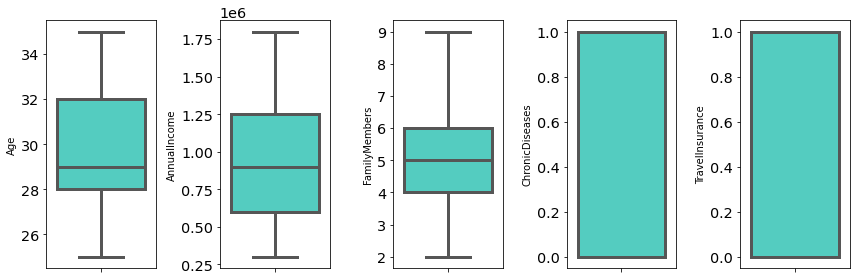

In [13]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='turquoise', orient='v')
    plt.tight_layout()

- Dilihat dari boxplot, tidak ada outlier dalam kolom age, annualincome, dan family members
- Dari boxplot juga terlihat bahwa **Age** akan skewed ke kiri / positively skewed

## Distribution Plot

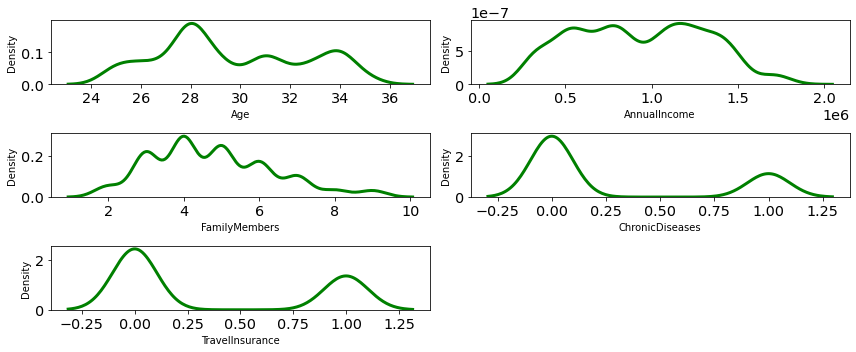

In [14]:
features = nums
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(3,2, i+1)
    sns.kdeplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

## Violin Plot

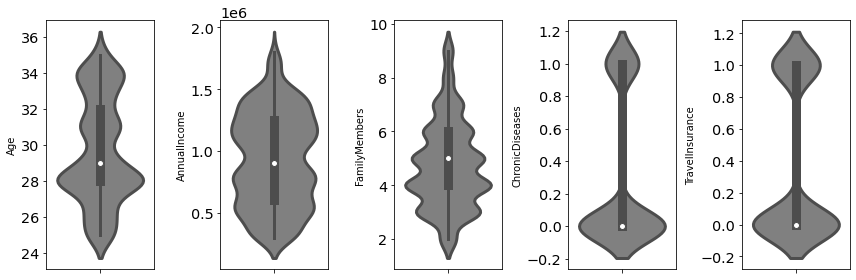

In [15]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

## Bar Plot for Categorical

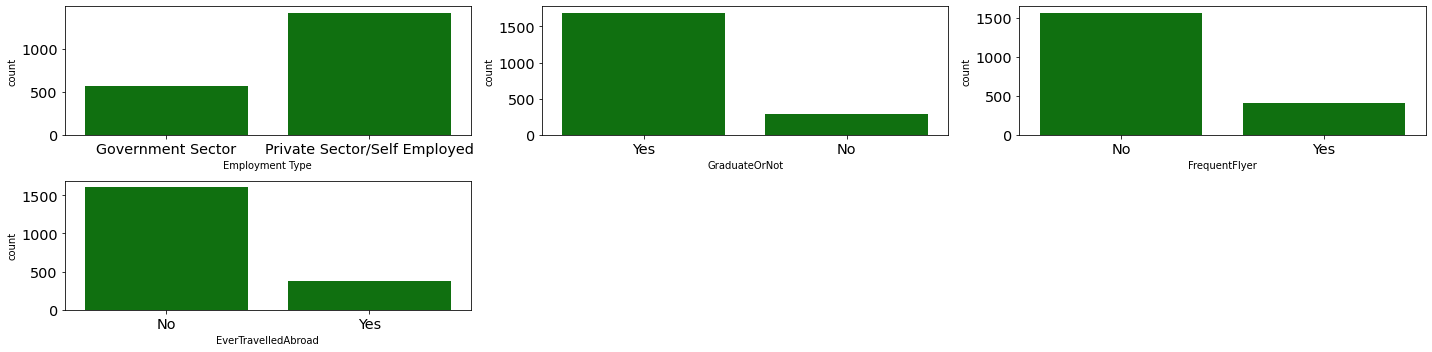

In [16]:
plt.figure(figsize=(20, 5))

for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df[cats[i]], color='green', orient='v')
    plt.tight_layout()


Beberapa pengamatan pada Bar Plot diatas:
- `Employment Type`: Didominasi oleh private worker/self-employed
- `Graduate or Not` : Didominasi oleh yang lulus
- `Frequent Flyer` : Didominasi oleh yang bukan merupakan FF
- `EverTravelledAbroad` : Didominasi oleh yang belum pernah

# Multivariate Analysis

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang diajarkan di kelas). Tuliskan hasil observasinya, seperti:

    A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
    B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?
    
Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

In [17]:
## Perlu dilakukan encoding untuk melihat korelasi data kategorikal
print('Sebelum')
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Sebelum
Value count kolom Employment Type:
Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64

Value count kolom GraduateOrNot:
Yes    1692
No      295
Name: GraduateOrNot, dtype: int64

Value count kolom FrequentFlyer:
No     1570
Yes     417
Name: FrequentFlyer, dtype: int64

Value count kolom EverTravelledAbroad:
No     1607
Yes     380
Name: EverTravelledAbroad, dtype: int64



In [18]:
df['Employment Type'].replace(['Government Sector', 'Private Sector/Self Employed'], [0, 1], inplace=True)
df['GraduateOrNot'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['FrequentFlyer'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['EverTravelledAbroad'].replace(['No', 'Yes'], [0, 1], inplace=True)

df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,0,1,400000,6,1,0,0,0
1,1,31,1,1,1250000,7,0,0,0,0
2,2,34,1,1,500000,4,1,0,0,1
3,3,28,1,1,700000,3,1,0,0,0
4,4,28,1,1,700000,8,1,1,0,0


In [19]:
print('Setelah melakukan encoding')
for col in cats:
  print(f'Jumlah baris di {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

Setelah melakukan encoding
Jumlah baris di Employment Type
1    1417
0     570
Name: Employment Type, dtype: int64
------------------------------ 

Jumlah baris di GraduateOrNot
1    1692
0     295
Name: GraduateOrNot, dtype: int64
------------------------------ 

Jumlah baris di FrequentFlyer
0    1570
1     417
Name: FrequentFlyer, dtype: int64
------------------------------ 

Jumlah baris di EverTravelledAbroad
0    1607
1     380
Name: EverTravelledAbroad, dtype: int64
------------------------------ 



## Correlation Heatmap

In [20]:
df.corr()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
Unnamed: 0,1.000000,-0.004917,-0.015769,-0.008602,-0.025031,-0.041506,-0.006858,-0.004596,-0.002160,0.006196
Age,-0.004917,1.000000,-0.115134,0.027125,-0.020101,0.027409,0.007359,-0.033159,-0.012779,0.061060
Employment Type,-0.015769,-0.115134,1.000000,-0.127133,0.349157,-0.003354,-0.011553,0.143790,0.181098,0.147847
GraduateOrNot,-0.008602,0.027125,-0.127133,1.000000,0.108066,0.021201,0.018811,-0.028120,0.062683,0.018934
AnnualIncome,-0.025031,-0.020101,0.349157,0.108066,1.000000,-0.015367,-0.001149,0.353087,0.486043,0.396763
FamilyMembers,-0.041506,0.027409,-0.003354,0.021201,-0.015367,1.000000,0.028209,-0.023775,-0.020755,0.079909
ChronicDiseases,-0.006858,0.007359,-0.011553,0.018811,-0.001149,0.028209,1.000000,-0.043720,0.021238,0.018190
FrequentFlyer,-0.004596,-0.033159,0.143790,-0.028120,0.353087,-0.023775,-0.043720,1.000000,0.277334,0.232103
EverTravelledAbroad,-0.002160,-0.012779,0.181098,0.062683,0.486043,-0.020755,0.021238,0.277334,1.000000,0.433183
TravelInsurance,0.006196,0.061060,0.147847,0.018934,0.396763,0.079909,0.018190,0.232103,0.433183,1.000000


<AxesSubplot:>

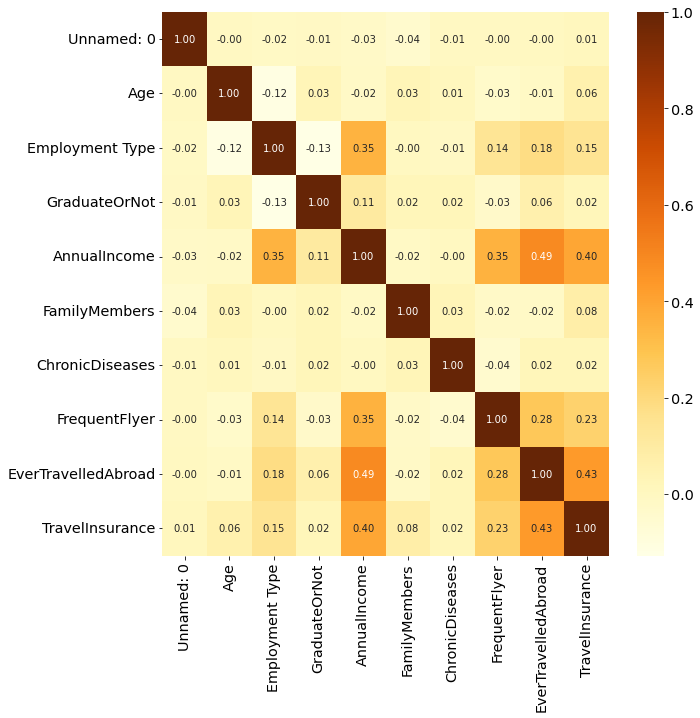

In [21]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='YlOrBr', annot=True, fmt='.2f')

Dari correlation heatmap diatas dapat dilihat bahwa:

- korelasi faktor-faktor terhadap pembelian asuransi semuanya positif
- faktor-faktor yang memiliki korelasi cukup tinggi terhadap pembelian travel insurance adalah: `Annual income` dan `EverTravelledAbroad`
- faktor-faktor yang memiliki korelasi lemah adalah; `EmploymentType`, `FrequentFlyer`
- `AnnualIncome` memiliki korelasi tinggi terhadap beberapa kolom lainnya (EmploymentType, FrequentFlyer, EverTravelledAbroad)  Apakah ini bisa diartikan kalau pendapatan seseorang akan sangat berpengaruh?

catatan: (namun korelasi ini sebenarnya lemah, namun relatif terhadap faktor lainnya)

## Pair Plot

In [22]:
df_2 = df[['AnnualIncome','EverTravelledAbroad','Employment Type','FrequentFlyer','TravelInsurance']]
df_2.head(1)

,AnnualIncome,EverTravelledAbroad,Employment Type,FrequentFlyer,TravelInsurance
0,400000,0,0,0,0


<Figure size 1080x1080 with 0 Axes>

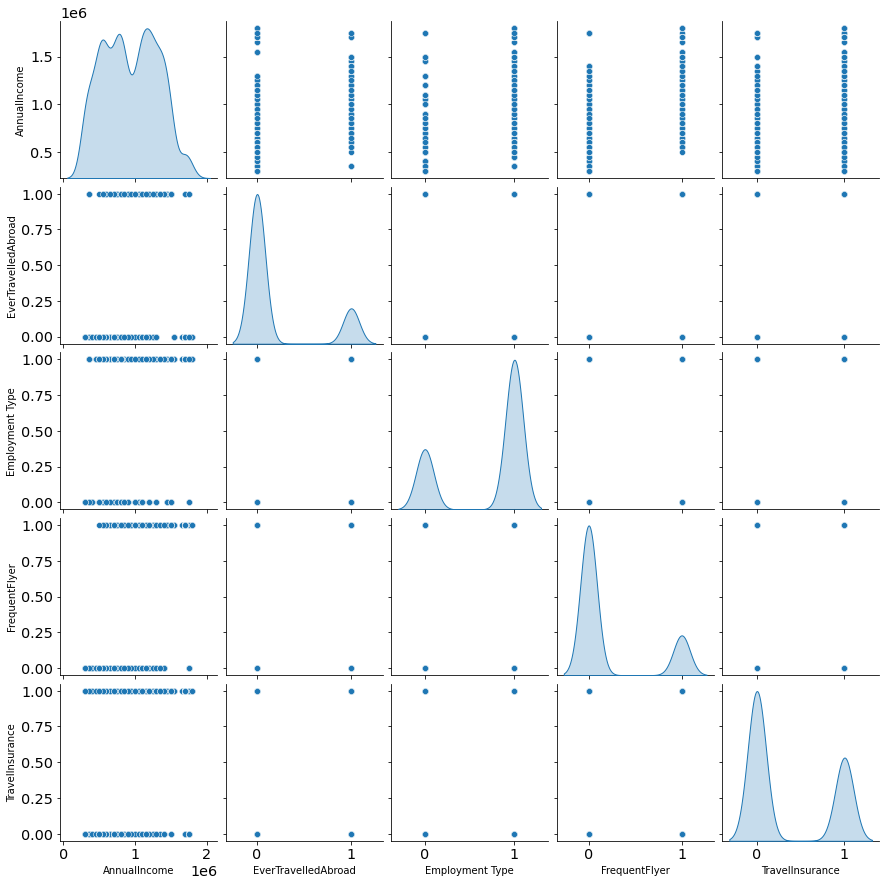

In [23]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_2, diag_kind='kde')

## Category Plot

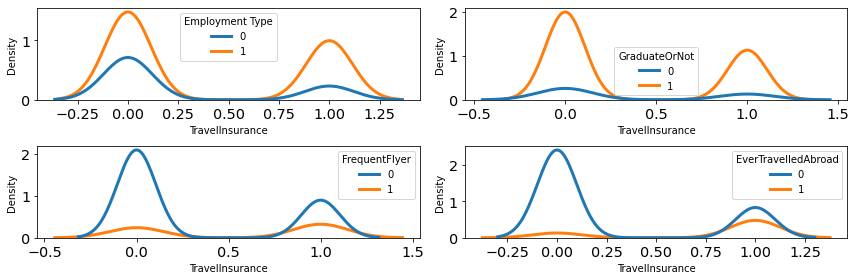

In [24]:
features = cats
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1) 
    sns.kdeplot(data=df, x='TravelInsurance', hue=features[i])
    #plt.xlabel(features[i])
    plt.tight_layout()

# Business Insight

Selain EDA, lakukan juga beberapa analisis dan visualisasi untuk menemukan suatu business insight. Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan rekomendasinya untuk bisnis.

## Berapa banyak pelanggan yang membeli Travel Insurance?

In [25]:
dummy1 = df.groupby('TravelInsurance').size().reset_index(name='counts')
dummy1['ratio'] = (dummy1['counts'])/1987*100
dummy1

,TravelInsurance,counts,ratio
0,0,1277,64.26774
1,1,710,35.73226


Berdasarkan tabel diatas, dari sebanyak 1987 Pelanggan, hanya `35,7 % yang membeli Travel Insurance`

## Apakah umur merupakah faktor penting dalam pembelian asuransi?

Text(0.5, 1.0, 'Travel Insurance Buyers by Age Category')

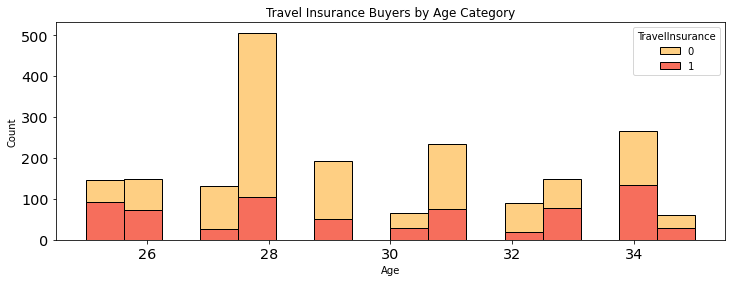

In [26]:
sns.histplot(x='Age', hue='TravelInsurance', data=df, color='indianred', palette="YlOrRd", multiple='stack')
plt.title('Travel Insurance Buyers by Age Category')

Text(0.5, 1.0, 'Travel Insurance Buyers by Age Category (Ratio)')

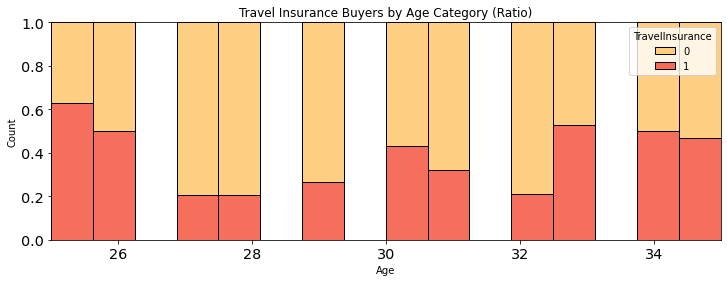

In [27]:
sns.histplot(x='Age', hue='TravelInsurance', data=df, color='indianred', palette="YlOrRd", multiple='fill')
plt.title('Travel Insurance Buyers by Age Category (Ratio)')

Insight:
- 25% Pelanggan berada di age grup `28`, namun di grup umur ini yang membeli asuransi travel hanya 20%
- age grup `25` dan `26` secara global tidak terlalu banyak, namun di grup ini banyak yang membeli asuransi travel 63% dan 50%
- Age group `33-35` banyak juga yang membeli travel insurance

## Apakah EmploymentType merupakah faktor penting dalam pembelian asuransi?

Note :
- 0 = `Government Sector`
- 1 = `Private Sector / Self Employed`

In [28]:
dummy3 = df.groupby(['Employment Type','TravelInsurance']).size().reset_index(name='counts')
dummy3['ratio %'] = [75.5,24.56,59.7,40.3]
dummy3

,Employment Type,TravelInsurance,counts,ratio %
0,0,0,430,75.50
1,0,1,140,24.56
2,1,0,847,59.70
3,1,1,570,40.30


<AxesSubplot:xlabel='Employment Type', ylabel='Count'>

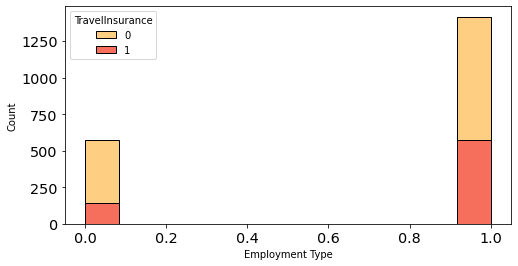

In [29]:
plt.figure(figsize=(8,4))
sns.histplot(x='Employment Type', hue='TravelInsurance', data=df, color='indianred', palette="YlOrRd", multiple='stack')

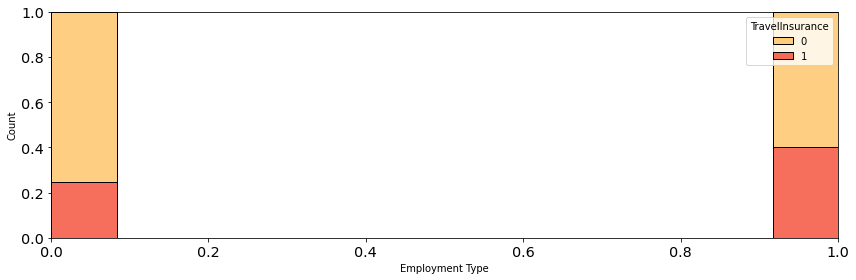

In [30]:
sns.histplot(x='Employment Type', hue='TravelInsurance', data=df, color='indianred', palette="YlOrRd", multiple='fill')
plt.tight_layout()

Insight:
- Private Sector / Self Employed lebih mungkin untuk membeli asuransi (40.3%) dibandingkan dengan gov.sector (24.6%)

## Apakah GraduateOrNot merupakah faktor penting dalam pembelian asuransi?

In [31]:
dummy4 = df.groupby(['GraduateOrNot','TravelInsurance']).size().reset_index(name='counts')
dummy4['ratio %'] = [66.44, 33.55, 63.88, 36.11]
dummy4

,GraduateOrNot,TravelInsurance,counts,ratio %
0,0,0,196,66.44
1,0,1,99,33.55
2,1,0,1081,63.88
3,1,1,611,36.11


Text(0.5, 1.0, 'Travel Insurance Buyers by Education')

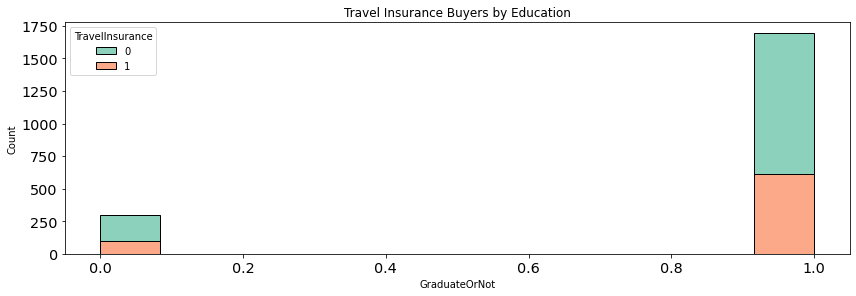

In [32]:
sns.histplot(x='GraduateOrNot', hue='TravelInsurance', data=df, color='indianred', palette="Set2", multiple='stack')
plt.tight_layout()
plt.title('Travel Insurance Buyers by Education')

Text(0.5, 1.0, 'Travel Insurance Buyers by Education (Ratio)')

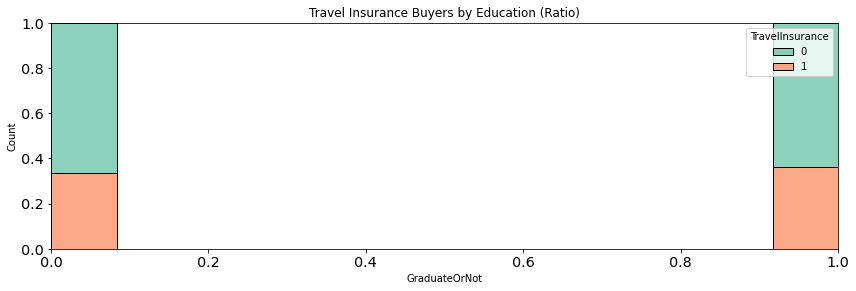

In [33]:
sns.histplot(x='GraduateOrNot', hue='TravelInsurance', data=df, color='indianred', palette="Set2", multiple='fill')
plt.tight_layout()
plt.title('Travel Insurance Buyers by Education (Ratio)')

Insight :
- Baik yang graduate atau tidak, tendensi pembelian asuransi cenderung sama

## Apakah AnnualIncome mempengaruhi pembelian Travel Insurance?

Text(0.5, 1.0, 'Travel Insurance Buyers by Annual Income')

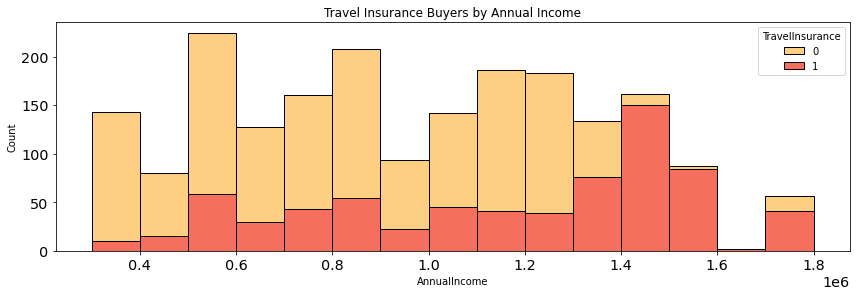

In [34]:
sns.histplot(x='AnnualIncome', hue='TravelInsurance', data=df, color='indianred', palette="YlOrRd", multiple='stack')
plt.tight_layout()
plt.title('Travel Insurance Buyers by Annual Income')

Text(0.5, 1.0, 'Travel Insurance Buyers by Annual Income (Ratio)')

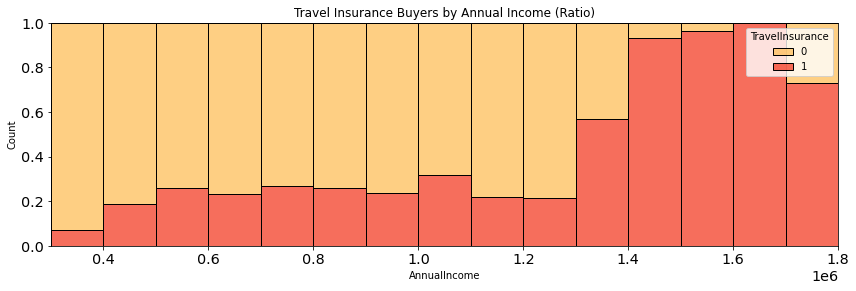

In [35]:
sns.histplot(x='AnnualIncome', hue='TravelInsurance', data=df, color='indianred', palette="YlOrRd", multiple='fill')
plt.tight_layout()
plt.title('Travel Insurance Buyers by Annual Income (Ratio)')

Insight :
- Terlihat dari histogram, perubahan pembelian asuransi travel terlihat di income 1.3 dan seterusnya. Mereka yang memiliki income >1,3 M cenderung membeli travel insurance

## Apakah FamilyMember mempengaruhi pembelian Travel Insurance?

In [36]:
dummy6= df.groupby(['FamilyMembers','TravelInsurance']).size().reset_index(name='counts')
dummy6['ratio %'] = [70.97, 29.03, 64.19, 35.81, 68.32, 31.68, 69.25, 30.75, 56.12, 43.88, 54.49, 45.51, 64.41, 35.59, 52.73, 47.27]
dummy6

,FamilyMembers,TravelInsurance,counts,ratio %
0,2,0,66,70.97
1,2,1,27,29.03
2,3,0,242,64.19
3,3,1,135,35.81
4,4,0,345,68.32
5,4,1,160,31.68
6,5,0,295,69.25
7,5,1,131,30.75
8,6,0,165,56.12
9,6,1,129,43.88


Text(0.5, 1.0, 'Travel Insurance Buyers by Family Members')

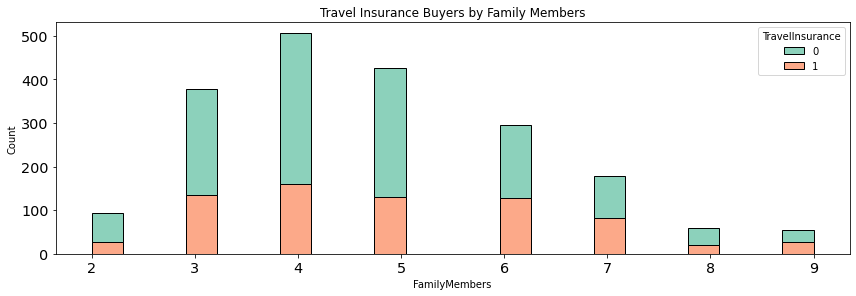

In [37]:
sns.histplot(x='FamilyMembers', hue='TravelInsurance', data=df, palette="Set2", multiple='stack')
plt.tight_layout()
plt.title('Travel Insurance Buyers by Family Members')

Text(0.5, 1.0, 'Travel Insurance Buyers by Family Members (Ratio)')

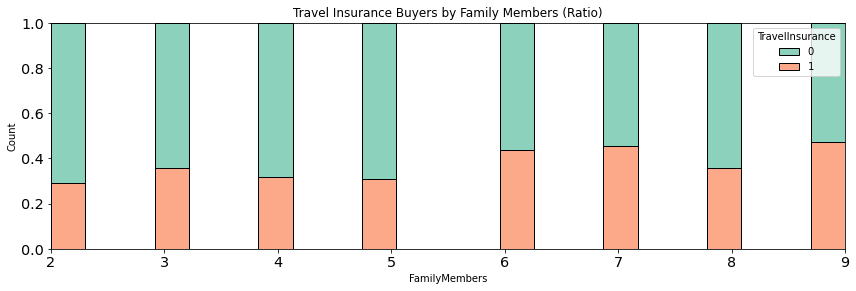

In [38]:
sns.histplot(x='FamilyMembers', hue='TravelInsurance', data=df, palette="Set2", multiple='fill')
plt.tight_layout()
plt.title('Travel Insurance Buyers by Family Members (Ratio)')

## Apakah ChronicDiseases merupakan faktor penting?

In [39]:
dummy7= df.groupby(['ChronicDiseases','TravelInsurance']).size().reset_index(name='counts')
dummy7['ratio %'] = [64.80, 35.19, 62.86, 37.13]
dummy7

,ChronicDiseases,TravelInsurance,counts,ratio %
0,0,0,930,64.80
1,0,1,505,35.19
2,1,0,347,62.86
3,1,1,205,37.13


Text(0.5, 1.0, 'Travel Insurance Buyers by Chronic Diseases')

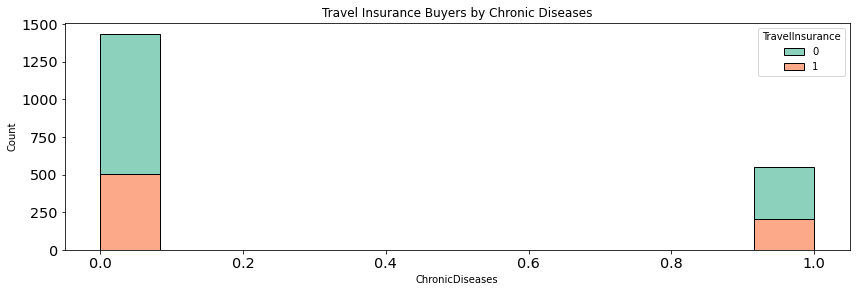

In [40]:
sns.histplot(x='ChronicDiseases', hue='TravelInsurance', data=df, palette="Set2", multiple='stack')
plt.tight_layout()
plt.title('Travel Insurance Buyers by Chronic Diseases')

Text(0.5, 1.0, 'Travel Insurance Buyers by Chronic Disease')

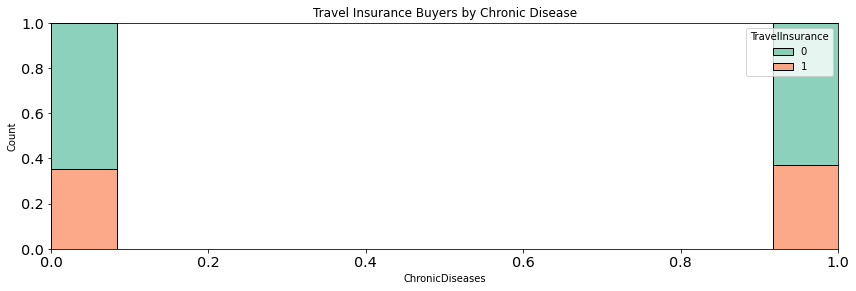

In [41]:
sns.histplot(x='ChronicDiseases', hue='TravelInsurance', data=df, palette="Set2", multiple='fill')
plt.tight_layout()
plt.title('Travel Insurance Buyers by Chronic Disease')

Insight:
- Tidak ada perbedaan yang berarti dalam chronic disease, orang yang memiliki penyakit dan tidak memiliki peluang yang sama dalam pembelian asuransi

## Apakah FrequentFlyer mempengaruhi pembelian asuransi?

In [42]:
dummy8= df.groupby(['FrequentFlyer','TravelInsurance']).size().reset_index(name='counts')
dummy8['ratio %'] = [70, 30, 42.68, 57.32]
dummy8

,FrequentFlyer,TravelInsurance,counts,ratio %
0,0,0,1099,70.00
1,0,1,471,30.00
2,1,0,178,42.68
3,1,1,239,57.32


Text(0.5, 1.0, 'Travel Insurance Buyers by Frequent Flyer')

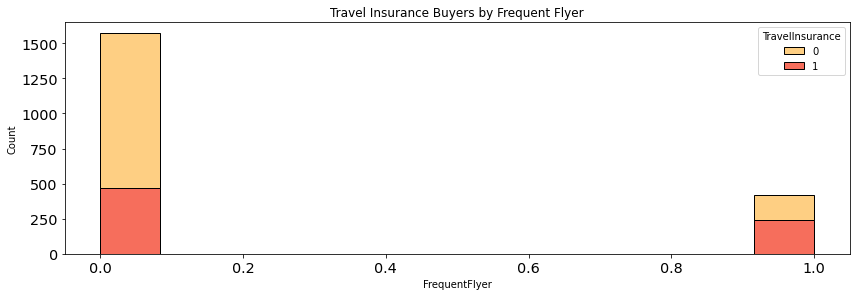

In [43]:
sns.histplot(x='FrequentFlyer', hue='TravelInsurance', data=df, palette="YlOrRd", multiple='stack')
plt.tight_layout()
plt.title('Travel Insurance Buyers by Frequent Flyer')

Text(0.5, 1.0, 'Travel Insurance Buyers by Frequent Flyer (Ratio)')

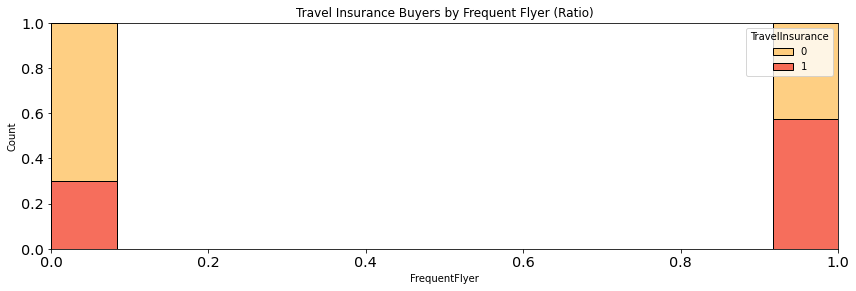

In [44]:
sns.histplot(x='FrequentFlyer', hue='TravelInsurance', data=df, palette="YlOrRd", multiple='fill')
plt.tight_layout()
plt.title('Travel Insurance Buyers by Frequent Flyer (Ratio)')

Insight:
- Mereka yang sering terbang, akan lebih mungkin membeli asuransi

## Apakah EverTravelledAbroad mempengaruhi pembelian asuransi?

In [45]:
dummy9= df.groupby(['EverTravelledAbroad','TravelInsurance']).size().reset_index(name='counts')
dummy9['ratio %'] = [74.36, 25.64, 21.57, 78.43]
dummy9

,EverTravelledAbroad,TravelInsurance,counts,ratio %
0,0,0,1195,74.36
1,0,1,412,25.64
2,1,0,82,21.57
3,1,1,298,78.43


Text(0.5, 1.0, 'Travel Insurance Buyers by Ever Travelled Abroad')

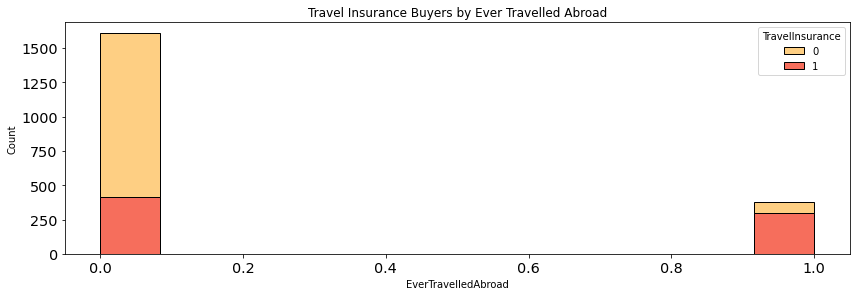

In [46]:
sns.histplot(x='EverTravelledAbroad', hue='TravelInsurance', data=df, palette="YlOrRd", multiple='stack')
plt.tight_layout()
plt.title('Travel Insurance Buyers by Ever Travelled Abroad')

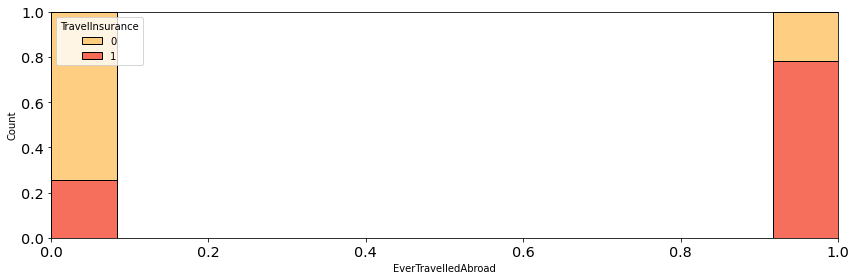

In [47]:
sns.histplot(x='EverTravelledAbroad', hue='TravelInsurance', data=df, palette="YlOrRd", multiple='fill')
plt.tight_layout()

Insight:
- Orang yang pernah pergi ke luar negeri akan sangat lebih mungkin membeli asuransi (78% vs 25%)

# EDA Conclusion
Beberapa hal yang kita temukan dari EDA dataset ini adalah:
* Data terlihat valid dan tidak ada kecacatan yang major/signifikan
* Data tidak terlihat ada yang null
* Ada beberapa distribusi yang sedikit *skewed*, hal ini harus diingat apabila kita ingin melakukan sesuatu atau menggunakan model yang memerlukan asumsi distribusi normal
* Beberapa *feature* memiliki korelasi yang jelas dengan *target*, mereka akan dipakai
* Beberapa *feature* terlihat sama sekali tidak berkorelasi, mereka sebaiknya diabaikan
* Ada feature yang korelasinya tinggi satu sama lain (`AnnualIncome`/`EverTravelledAbroad`)

# Data Cleansing

- Membuang feature yang tidak penting
- Handle missing values 
- Handle duplicated data (Alya/Ariq)
- Handle outliers (Fauzan/Lewis)
- Feature transformation (Hafidz/Tidar)
- Feature encoding 
- Handle class imbalance (Alya/Ariq)

## Membuang feature yang tidak penting

In [48]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


## Handle Missing Value

In [49]:
df.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

Data terlihat tidak ada missing value

## Handle duplicated data

In [50]:
df.duplicated().sum()

738

In [51]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True) 
print(df.duplicated().sum())

738
0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 0 to 1985
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  1249 non-null   int64
 1   Employment Type      1249 non-null   int64
 2   GraduateOrNot        1249 non-null   int64
 3   AnnualIncome         1249 non-null   int64
 4   FamilyMembers        1249 non-null   int64
 5   ChronicDiseases      1249 non-null   int64
 6   FrequentFlyer        1249 non-null   int64
 7   EverTravelledAbroad  1249 non-null   int64
 8   TravelInsurance      1249 non-null   int64
dtypes: int64(9)
memory usage: 97.6 KB


Data terlihat sudah tidak ada duplikat

## Handle Outliers

In [53]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in nums:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 1249
Jumlah baris setelah memfilter outlier: 1249


Handle outlier dilakukan dengan metode Z-Score dan dari hasilnya tidak terdapat data yang outlier

## Feature transformation

In [54]:
df.sample(4)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1829,31,1,1,1400000,4,1,0,1,1
1302,28,1,0,550000,3,0,0,0,1
844,33,0,1,1100000,2,0,0,0,0
296,32,0,1,350000,7,0,0,0,0


In [55]:
df.describe()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1249.000000,1249.000000,1249.000000,1.249000e+03,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000
mean,29.755805,0.701361,0.838271,9.345476e+05,4.890312,0.333066,0.236189,0.195356,0.386709
std,2.921039,0.457844,0.368350,3.607293e+05,1.762313,0.471499,0.424910,0.396634,0.487191
min,25.000000,0.000000,0.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,1.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,9.000000e+05,5.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,1.000000,1.000000,1.200000e+06,6.000000,1.000000,0.000000,0.000000,1.000000
max,35.000000,1.000000,1.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000,1.000000


### Normalization

In [56]:
list_col_abnormal = []

for i in df:
  if df[i].min() != 0 and df[i].max() != 1:
    list_col_abnormal.append(i)

print(list_col_abnormal)

['Age', 'AnnualIncome', 'FamilyMembers']


In [57]:
# Cek nilai min dan max pada column tersebut, apakah benar tidak 0 s/d 1?
df[list_col_abnormal].describe()

,Age,AnnualIncome,FamilyMembers
count,1249.000000,1.249000e+03,1249.000000
mean,29.755805,9.345476e+05,4.890312
std,2.921039,3.607293e+05,1.762313
min,25.000000,3.000000e+05,2.000000
25%,28.000000,6.000000e+05,4.000000
50%,29.000000,9.000000e+05,5.000000
75%,32.000000,1.200000e+06,6.000000
max,35.000000,1.800000e+06,9.000000


In [58]:
from sklearn.preprocessing import MinMaxScaler
for i in list_col_abnormal:
      df[i] = MinMaxScaler().fit_transform(df[i].values.reshape(len(df),1))

In [59]:
# Setelah di normalisasi, semua data memiliki skala min dan max yang sama. 0 s/d 1
df.describe()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000
mean,0.475580,0.701361,0.838271,0.423032,0.412902,0.333066,0.236189,0.195356,0.386709
std,0.292104,0.457844,0.368350,0.240486,0.251759,0.471499,0.424910,0.396634,0.487191
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.300000,0.000000,1.000000,0.200000,0.285714,0.000000,0.000000,0.000000,0.000000
50%,0.400000,1.000000,1.000000,0.400000,0.428571,0.000000,0.000000,0.000000,0.000000
75%,0.700000,1.000000,1.000000,0.600000,0.571429,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Standarization

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
for i in df.columns.tolist()[:-1]:
      df[i] = StandardScaler().fit_transform(df[i].values.reshape(len(df),1))

In [62]:
df.describe()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1249.000000
mean,1.850668e-16,2.522668e-16,1.982224e-17,1.811112e-17,-9.697785e-17,-6.033782e-16,-2.092446e-16,1.088001e-16,0.386709
std,1.000401e+00,1.000401e+00,1.000401e+00,1.000401e+00,1.000401e+00,1.000401e+00,1.000401e+00,1.000401e+00,0.487191
min,-1.628773e+00,-1.532490e+00,-2.276657e+00,-1.759773e+00,-1.640724e+00,-7.066822e-01,-5.560794e-01,-4.927333e-01,0.000000
25%,-6.013299e-01,-1.532490e+00,4.392405e-01,-9.277917e-01,-5.053976e-01,-7.066822e-01,-5.560794e-01,-4.927333e-01,0.000000
50%,-2.588488e-01,6.525328e-01,4.392405e-01,-9.581001e-02,6.226572e-02,-7.066822e-01,-5.560794e-01,-4.927333e-01,0.000000
75%,7.685945e-01,6.525328e-01,4.392405e-01,7.361717e-01,6.299291e-01,1.415063e+00,-5.560794e-01,-4.927333e-01,1.000000
max,1.796038e+00,6.525328e-01,4.392405e-01,2.400135e+00,2.332919e+00,1.415063e+00,1.798304e+00,2.029496e+00,1.000000


In [63]:
df['TravelInsurance'].unique()

array([0, 1], dtype=int64)

### Tambahan

In [86]:
#log income
df['log_AnnualIncome'] = np.log(df['AnnualIncome'])
#Normalisasi Annual Income
df['log_AnnualIncomes_norm'] = MinMaxScaler().fit_transform(df['log_AnnualIncome'].values.reshape(len(df), 1))
#Standarisasi Annual Income
df['log_AnnualIncomes_std'] = StandardScaler().fit_transform(df['log_AnnualIncome'].values.reshape(len(df), 1))

In [87]:
#Age
#Standarisasi
df['Age_std'] = StandardScaler().fit_transform(df['Age'].values.reshape(len(df), 1))
#normalisasi
df['Age_norm'] = MinMaxScaler().fit_transform(df['Age'].values.reshape(len(df), 1))

In [88]:
#FamilyMembers
#Standardisasi
df['FamilyMembers_std'] = StandardScaler().fit_transform(df['FamilyMembers'].values.reshape(len(df), 1))
#Normalisasi
df['FamilyMembers_norm'] = MinMaxScaler().fit_transform(df['FamilyMembers'].values.reshape(len(df), 1))

## Feature encoding

In [64]:
cats

['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']

In [66]:
df.describe()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1249.000000
mean,1.850668e-16,2.522668e-16,1.982224e-17,1.811112e-17,-9.697785e-17,-6.033782e-16,-2.092446e-16,1.088001e-16,0.386709
std,1.000401e+00,1.000401e+00,1.000401e+00,1.000401e+00,1.000401e+00,1.000401e+00,1.000401e+00,1.000401e+00,0.487191
min,-1.628773e+00,-1.532490e+00,-2.276657e+00,-1.759773e+00,-1.640724e+00,-7.066822e-01,-5.560794e-01,-4.927333e-01,0.000000
25%,-6.013299e-01,-1.532490e+00,4.392405e-01,-9.277917e-01,-5.053976e-01,-7.066822e-01,-5.560794e-01,-4.927333e-01,0.000000
50%,-2.588488e-01,6.525328e-01,4.392405e-01,-9.581001e-02,6.226572e-02,-7.066822e-01,-5.560794e-01,-4.927333e-01,0.000000
75%,7.685945e-01,6.525328e-01,4.392405e-01,7.361717e-01,6.299291e-01,1.415063e+00,-5.560794e-01,-4.927333e-01,1.000000
max,1.796038e+00,6.525328e-01,4.392405e-01,2.400135e+00,2.332919e+00,1.415063e+00,1.798304e+00,2.029496e+00,1.000000


In [65]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Employment Type:
 0.652533    876
-1.532490    373
Name: Employment Type, dtype: int64

Value count kolom GraduateOrNot:
 0.439240    1047
-2.276657     202
Name: GraduateOrNot, dtype: int64

Value count kolom FrequentFlyer:
-0.556079    954
 1.798304    295
Name: FrequentFlyer, dtype: int64

Value count kolom EverTravelledAbroad:
-0.492733    1005
 2.029496     244
Name: EverTravelledAbroad, dtype: int64



Setiap kolom kategorical dilakukan label encoding karena hanya memiliki 2 atribut di setiap kolomnya. Untuk employment type diberikan kode 0 (Government) dan 1 (Private/Self-Employed) dan yang lain diberikan kode 1 (yes) dan 0 (no)

## Handle class imbalance

In [67]:
df['TravelInsurance'].value_counts()

0    766
1    483
Name: TravelInsurance, dtype: int64

In [68]:
# pemisahan features vs target
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['TravelInsurance']]]
y = df['TravelInsurance'].values
print(X.shape)
print(y.shape)
y

(1249, 8)
(1249,)


array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [69]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(0.8).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(0.8).fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.8).fit_resample(X, y)

C:\Users\LENOVO\Documents\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(
C:\Users\LENOVO\Documents\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(
C:\Users\LENOVO\Documents\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [70]:
print('Original')
print(pd.Series(y).value_counts())
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    766
1    483
dtype: int64
UNDERSAMPLING
0    603
1    483
dtype: int64
OVERSAMPLING
0    766
1    612
dtype: int64
SMOTE
0    766
1    612
dtype: int64


# Feature Engineering

## Feature selection (membuang feature yang kurang relevan atau redundan)

In [71]:
df_select = df.corr(method='pearson')
df_select['TravelInsurance'].apply(lambda x:abs(x))

Age                    0.067536
Employment Type        0.076309
GraduateOrNot          0.031770
AnnualIncome           0.293913
FamilyMembers          0.084907
ChronicDiseases        0.010015
FrequentFlyer          0.127426
EverTravelledAbroad    0.301224
TravelInsurance        1.000000
Name: TravelInsurance, dtype: float64

In [74]:
df_backup = df

In [75]:
df_backup.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0.426113,-1.532490,0.43924,-1.482446,0.629929,1.415063,-0.556079,-0.492733,0
1,0.426113,0.652533,0.43924,0.874835,1.197592,-0.706682,-0.556079,-0.492733,0
2,1.453557,0.652533,0.43924,-1.205119,-0.505398,1.415063,-0.556079,-0.492733,1
3,-0.601330,0.652533,0.43924,-0.650464,-1.073061,1.415063,-0.556079,-0.492733,0
4,-0.601330,0.652533,0.43924,-0.650464,1.765256,1.415063,1.798304,-0.492733,0


## Feature extraction (membuat feature baru dari feature yang sudah ada)

In [76]:
def Income(row):
    if row['AnnualIncome'] > 1300000:
        return 1
    else:
        return 0
    
df_backup['IncomeSegmentation'] = df_backup.apply(Income, axis=1)

In [77]:
df_backup.sample(5)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,IncomeSegmentation
469,-1.628773,0.652533,-2.276657,2.122808,0.062266,-0.706682,1.798304,-0.492733,1,0
1080,-0.601330,0.652533,0.439240,-0.650464,1.197592,-0.706682,-0.556079,-0.492733,0,0
356,1.453557,0.652533,0.439240,0.181517,-0.505398,-0.706682,-0.556079,-0.492733,0,0
100,-0.601330,0.652533,0.439240,1.013499,0.629929,1.415063,-0.556079,-0.492733,1,0
6,0.426113,-1.532490,0.439240,1.013499,-0.505398,-0.706682,-0.556079,-0.492733,0,0


In [78]:
def Income(row):
    if (row['AnnualIncome'] > 1300000) and (row['Employment Type'] == 'Private Sector/Self Employed') and (row['EverTravelledAbroad'] == 'Yes') and (row['FrequentFlyer'] == 'Yes'):
        return 1
    else:
        return 0
    
df_backup['PotentialCustomer'] = df_backup.apply(Income, axis=1)

In [79]:
def Income(row):
  if row['Age'] in list(range(25,27)) or row['Age'] in list(range(33,36)):
    return 1
  else:
    return 0
    
df_backup['PotentialAge'] = df_backup.apply(Income, axis=1)

In [80]:
def Income(row):
  if row['ChronicDiseases'] == 1 and (row['Age'] > 33):
    return 1
  else:
    return 0
    
df_backup['PotentialDeath'] = df_backup.apply(Income, axis=1)

In [82]:
df_backup.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,IncomeSegmentation,PotentialCustomer,PotentialAge,PotentialDeath
0,0.426113,-1.532490,0.43924,-1.482446,0.629929,1.415063,-0.556079,-0.492733,0,0,0,0,0
1,0.426113,0.652533,0.43924,0.874835,1.197592,-0.706682,-0.556079,-0.492733,0,0,0,0,0
2,1.453557,0.652533,0.43924,-1.205119,-0.505398,1.415063,-0.556079,-0.492733,1,0,0,0,0
3,-0.601330,0.652533,0.43924,-0.650464,-1.073061,1.415063,-0.556079,-0.492733,0,0,0,0,0
4,-0.601330,0.652533,0.43924,-0.650464,1.765256,1.415063,1.798304,-0.492733,0,0,0,0,0
